# Building Support Vector Machine (SVM) Algorithm for classification task

In [1]:
# Import the needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
# Importing the dataset
dataset = pd.read_csv('SVMdataset.csv')
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values

In [3]:
# Splitting the dataset into the Training set & Testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [4]:
# Aplying Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Fitting SVM classifier to our Training set
svmclassifier = SVC(kernel = 'linear' , random_state = 0)
svmclassifier = svmclassifier.fit (X_train, Y_train)

In [6]:
# Predicting the Test set results
Y_pred = svmclassifier.predict(X_test)

In [7]:
# Making the Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[66,  2],
       [ 8, 24]])

In [8]:
# Visualising the results
def Visualize(X, Y):
    X_set, Y_set = X, Y
    X1, X2 = np.meshgrid(
        np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)
    )
    plt.contourf(
        X1, 
        X2, 
        svmclassifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
        alpha = 0.75, 
        cmap = ListedColormap(('red', 'blue'))
    )
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(Y_set)):
        plt.scatter(
            X_set[Y_set == j, 0], 
            X_set[Y_set == j, 1],
            c = ListedColormap(('red', 'blue'))(i), 
            label = j
        )
    plt.title('SVM (Training set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salaries')
    plt.legend()
    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


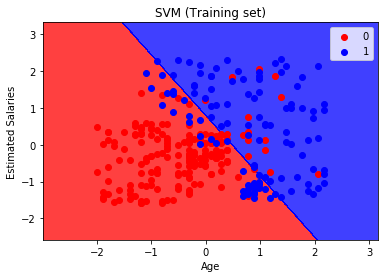

In [9]:
# Visualising the Training set results
Visualize(X_train, Y_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


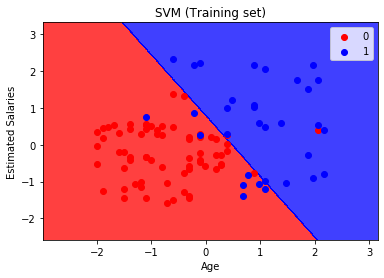

In [10]:
# Visualising the Test set results
Visualize(X_test, Y_test)